<a href="https://colab.research.google.com/github/Chubbyman2/Resume/blob/master/K_Means_Clustering_Iris_Datset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iris Dataset:

https://www.kaggle.com/vvenanccio/irisflowers

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
datafile = "/content/gdrive/My Drive/iris_dataset.csv"

# Use numpy's helper functions to load data as numpy arrays
data = np.genfromtxt(
    datafile,
    delimiter=",",
    usecols=range(0, 4), # Extracts 1st-3rd columns
    skip_header=1
)

true_label_names = np.genfromtxt(
    datafile,
    delimiter=",",
    usecols=(4),
    skip_header=1,
    dtype="str"
)

In [ ]:
# First 3 columns of data for first 5 samples
data[:5, :3]

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4]])

In [ ]:
# Labels of first 5 samples
true_label_names[:5]

array(['SETOSA', 'SETOSA', 'SETOSA', 'SETOSA', 'SETOSA'], dtype='<U10')

In [ ]:
# Convert "Setosa", "Versicolor", "Virginica" to integers
label_encoder = LabelEncoder()

true_labels = label_encoder.fit_transform(true_label_names)

true_labels[:5]

array([0, 0, 0, 0, 0])

In [ ]:
# 3 unique classes - Setosa, Versicolor, Virginica
label_encoder.classes_

array(['SETOSA', 'VERSICOLOR', 'VIRGINICA'], dtype='<U10')

In [ ]:
# Therefore, 3 clusters
n_clusters = len(label_encoder.classes_)
n_clusters

3

**Dimensionality Reduction and Principal Component Analysis (PCA)**

As the number of dimensions increases, the feature space increases at a rapid pace, becoming sparse.

The objects then become very separated and difficult for algorithms to group.

This is the **Curse of Dimensionality** and is fixed by using PCA to project input data into a lower number of dimensions called **components**.

https://en.wikipedia.org/wiki/Curse_of_dimensionality

In [ ]:
# Preprocessing Pipeline
# Use MinMaxScaler for feature scaling
# Reduces 4 features of irises to 2 components
preprocessor = Pipeline([("scaler", MinMaxScaler()), 
                         ("pca", PCA(n_components=2, random_state=None))])

In [ ]:
# K-means Pipeline
# Use k-means++ to ensure centroids are initialized with some distance between them
clusterer = Pipeline([("kmeans", KMeans(n_clusters=n_clusters, 
                                        init="k-means++", 
                                        n_init=50, 
                                        max_iter=500, 
                                        random_state=None))])

In [ ]:
# Chain the pipelines, build and end-to-end k-means clustering pipeline
pipe = Pipeline([("preprocessor", preprocessor), 
                 ("clusterer", clusterer)])

In [ ]:
pipe.fit(data)

Pipeline(memory=None,
         steps=[('preprocessor',
                 Pipeline(memory=None,
                          steps=[('scaler',
                                  MinMaxScaler(copy=True,
                                               feature_range=(0, 1))),
                                 ('pca',
                                  PCA(copy=True, iterated_power='auto',
                                      n_components=2, random_state=None,
                                      svd_solver='auto', tol=0.0,
                                      whiten=False))],
                          verbose=False)),
                ('clusterer',
                 Pipeline(memory=None,
                          steps=[('kmeans',
                                  KMeans(algorithm='auto', copy_x=True,
                                         init='k-means++', max_iter=500,
                                         n_clusters=3, n_init=50, n_jobs=None,
                                         preco

**The Silhouette Coefficient**

Quantifies how well a data point fits into its assigned cluster based on:

1. How close the data point is to others in the cluster

2. How far away the data point is from others in other clusters

Silhouette coefficient values range from -1 to 1, with values closer to 1 being better.

In [ ]:
# Evaluate performance by calculating the silhouette coefficient
preprocessed_data = pipe["preprocessor"].transform(data)
predicted_labels = pipe["clusterer"]["kmeans"].labels_

silhouette_score(preprocessed_data, predicted_labels)

0.5652241879059784

In [ ]:
# Adjusted random (ARI) score indicates how close the predicted labels and true labels
# are to forming identical clusters (0-1)
adjusted_rand_score(true_labels, predicted_labels)

0.7163421126838475

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


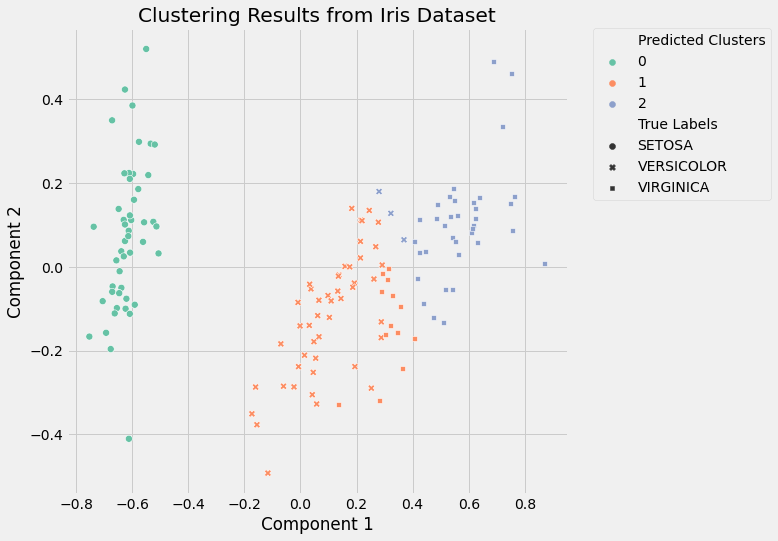

In [50]:
# Visualize with pandas
pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(data),
    columns=["Component 1", "Component 2"]
)

pcadf["Predicted Clusters"] = pipe["clusterer"]["kmeans"].labels_
pcadf["True Labels"] = label_encoder.inverse_transform(true_labels)

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scatter = sns.scatterplot(
    "Component 1",
    "Component 2",
    s=50,
    data=pcadf,
    hue="Predicted Clusters",
    style="True Labels",
    palette="Set2"
)

scatter.set_title(
    "Clustering Results from Iris Dataset"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()